# Mobile Phone Price Range Prediction

Dataset Sample:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scre

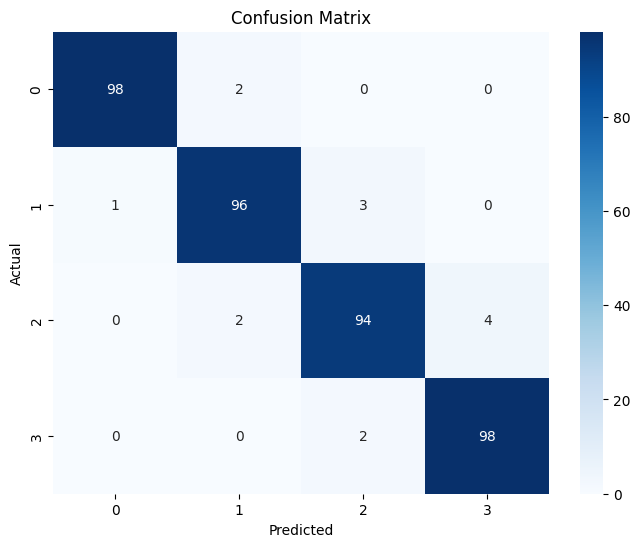

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Step 1: Load Dataset
df = pd.read_csv('dataset.csv')  # Replace with your actual file name

# Displaying 1st five rows
print("Dataset Sample:")
print(df.head())


# Step 2: Data Preprocessing
print("\n\nMissing Values:\n", df.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('price_range', axis=1))

X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['price_range']


# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Step 4: Train Multiple ML models

# 1. Logistic Regression
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"\n\nLogistic Regression Accuracy: {log_accuracy:.2f}")

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


# Step 5: Evaluate the Best Model
best_model = rf_model if rf_accuracy > log_accuracy else log_model
best_preds = rf_preds if rf_accuracy > log_accuracy else log_preds

print("\n\nBest Model Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, best_preds))
print("\nClassification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))


# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [3]:
# Step 7: Making Predictions on new data
# Sample new mobile phone data using correct column names
new_data = pd.DataFrame({
    'battery_power': [1200, 1800],
    'blue': [1, 0],
    'clock_speed': [2.0, 1.8],
    'dual_sim': [1, 1],
    'fc': [1, 5],
    'four_g': [0, 1],
    'int_memory': [8, 64],
    'm_dep': [0.5, 0.9],
    'mobile_wt': [150, 180],
    'n_cores': [4, 8],
    'pc': [5, 13],
    'px_height': [500, 1200],
    'px_width': [800, 1600],
    'ram': [1024, 4096],
    'sc_h': [10, 14],
    'sc_w': [5, 7],
    'talk_time': [10, 20],
    'three_g': [1, 1],
    'touch_screen': [1, 1],
    'wifi': [1, 1]
})

# Scaling new data
new_data_scaled = scaler.transform(new_data)

# Making predictions
predictions = best_model.predict(new_data_scaled)

# Output predictions
label_map = {0: "Low Cost", 1: "Medium Cost", 2: "High Cost", 3: "Very High Cost"}
for i, prediction in enumerate(predictions):
    print(f"\nPrediction for New Data Row {i+1}: {label_map[prediction]}")



Prediction for New Data Row 1: Low Cost

Prediction for New Data Row 2: Very High Cost


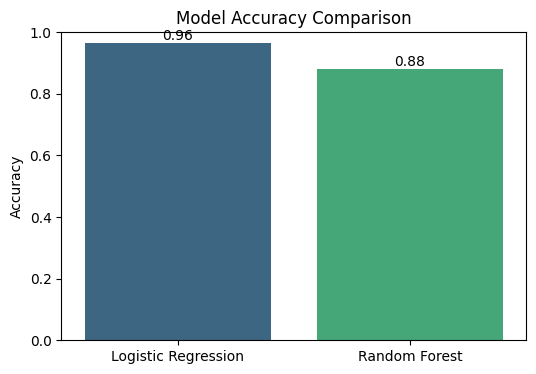

In [4]:
# Step 8: Visualize Model Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_accuracy, rf_accuracy]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')
plt.show()
